In [ ]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the data.

In [ ]:
data_dir = r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Training'
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir,  i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))

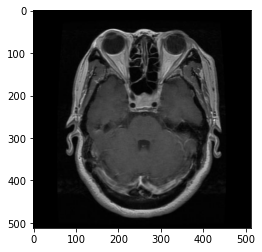

In [ ]:
plt.imshow(img_array);

In [ ]:
# The image shape.
img_array.shape

(512, 512, 3)

#### Ploting a image of each brain tumor type

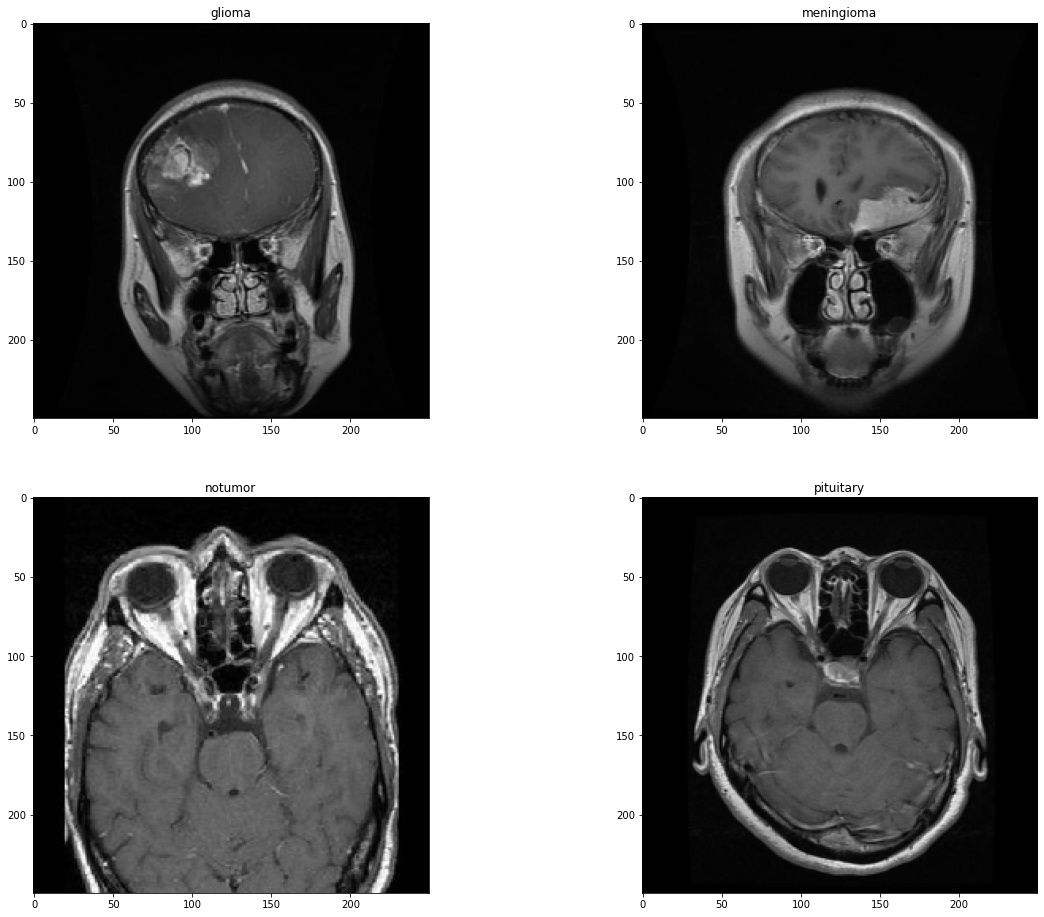

In [ ]:
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])

# Modelling


# CNN - Model 1

In [ ]:
# 96.95%

model1 = Sequential()

# Convolutional layer 1
model1.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

# Neural network

model1.add(Dense(units= 252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])



# using the ImageDataGenerator to prepare the images (Resize, nomalize, etc)

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

# Creating the train and test data.

train = generator_train.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Trainig model 1

In [ ]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model1_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model1_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model1_mcp = ModelCheckpoint(filepath = 'model1_weights.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)

# Fiting the model.
history1 = model1.fit(train, steps_per_epoch=5712//32, epochs=50, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model1_es, model1_rlr, model1_mcp])

Train for 178 steps, validate for 40 steps
Epoch 1/50
177/178 [============================>.] - ETA: 0s - loss: 0.7988 - categorical_accuracy: 0.7348
Epoch 00001: val_categorical_accuracy improved from -inf to 0.30547, saving model to model1_weights.h5
178/178 [==============================] - 16s 91ms/step - loss: 0.7991 - categorical_accuracy: 0.7347 - val_loss: 3.5302 - val_categorical_accuracy: 0.3055
Epoch 2/50
172/178 [===========================>..] - ETA: 0s - loss: 0.4462 - categorical_accuracy: 0.8332
Epoch 00002: val_categorical_accuracy improved from 0.30547 to 0.40625, saving model to model1_weights.h5
178/178 [==============================] - 15s 86ms/step - loss: 0.4448 - categorical_accuracy: 0.8338 - val_loss: 2.1615 - val_categorical_accuracy: 0.4062
Epoch 3/50
174/178 [============================>.] - ETA: 0s - loss: 0.3361 - categorical_accuracy: 0.8741
Epoch 00003: val_categorical_accuracy improved from 0.40625 to 0.75703, saving model to model1_weights.h5
178/

In [ ]:
model1.evaluate(test)

41/41 [==============================] - 3s 66ms/step - loss: 0.0594 - categorical_accuracy: 0.9870


[0.059396482942158796, 0.9870328]

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

# Model 2

In [ ]:

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model2.add(Conv2D(128,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model2.add(Conv2D(256,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model2.add(Conv2D(512,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Flatten())

# Full connect layers

model2.add(Dense(units= 512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])



In [ ]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')





Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Training model 2

In [ ]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model2_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model2_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model2_mcp = ModelCheckpoint(filepath = 'model2_weights.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)


# Fiting the model.
history2 = model2.fit(train, steps_per_epoch=5712//32, epochs=50, validation_data=test, validation_steps= 1311//32,
                      callbacks=[model2_es, model2_rlr, model2_mcp])

Train for 178 steps, validate for 40 steps
Epoch 1/50
177/178 [============================>.] - ETA: 0s - loss: 1.5157 - categorical_accuracy: 0.5956
Epoch 00001: val_categorical_accuracy improved from -inf to 0.25000, saving model to model2_weights.h5
178/178 [==============================] - 29s 165ms/step - loss: 1.5120 - categorical_accuracy: 0.5956 - val_loss: 2.6161 - val_categorical_accuracy: 0.2500
Epoch 2/50
177/178 [============================>.] - ETA: 0s - loss: 0.7234 - categorical_accuracy: 0.7222
Epoch 00002: val_categorical_accuracy improved from 0.25000 to 0.35313, saving model to model2_weights.h5
178/178 [==============================] - 27s 153ms/step - loss: 0.7232 - categorical_accuracy: 0.7227 - val_loss: 1.7280 - val_categorical_accuracy: 0.3531
Epoch 3/50
177/178 [============================>.] - ETA: 0s - loss: 0.6143 - categorical_accuracy: 0.7721
Epoch 00003: val_categorical_accuracy improved from 0.35313 to 0.55937, saving model to model2_weights.h5
17

In [ ]:
model2.evaluate(test)

41/41 [==============================] - 4s 90ms/step - loss: 0.0490 - categorical_accuracy: 0.9901


[0.048967055271610084, 0.99008393]

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)       401536    
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 256)      

# Model 3

In [ ]:
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())

# Full connect layers

model3.add(Dense(units= 512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])


In [ ]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model3_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model3_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model3_mcp = ModelCheckpoint(filepath = 'model3_weights.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)

# Fitting the model
history3 = model3.fit(train, steps_per_epoch=5712//32, epochs=50, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model3_es, model3_rlr, model3_mcp])

Train for 178 steps, validate for 40 steps
Epoch 1/50
177/178 [============================>.] - ETA: 0s - loss: 0.9613 - categorical_accuracy: 0.6696
Epoch 00001: val_categorical_accuracy improved from -inf to 0.40156, saving model to model3_weights.h5
178/178 [==============================] - 19s 109ms/step - loss: 0.9584 - categorical_accuracy: 0.6704 - val_loss: 1.6539 - val_categorical_accuracy: 0.4016
Epoch 2/50
177/178 [============================>.] - ETA: 0s - loss: 0.5816 - categorical_accuracy: 0.7705
Epoch 00002: val_categorical_accuracy improved from 0.40156 to 0.53828, saving model to model3_weights.h5
178/178 [==============================] - 17s 98ms/step - loss: 0.5801 - categorical_accuracy: 0.7711 - val_loss: 1.3147 - val_categorical_accuracy: 0.5383
Epoch 3/50
175/178 [============================>.] - ETA: 0s - loss: 0.4416 - categorical_accuracy: 0.8254
Epoch 00003: val_categorical_accuracy improved from 0.53828 to 0.74375, saving model to model3_weights.h5
178

In [ ]:
model3.evaluate(test)

41/41 [==============================] - 3s 81ms/step - loss: 0.0358 - categorical_accuracy: 0.9901


[0.03582946736190845, 0.99008393]

# Evaluating models 1, 2 and 3


Text(0.5, 1.0, 'Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

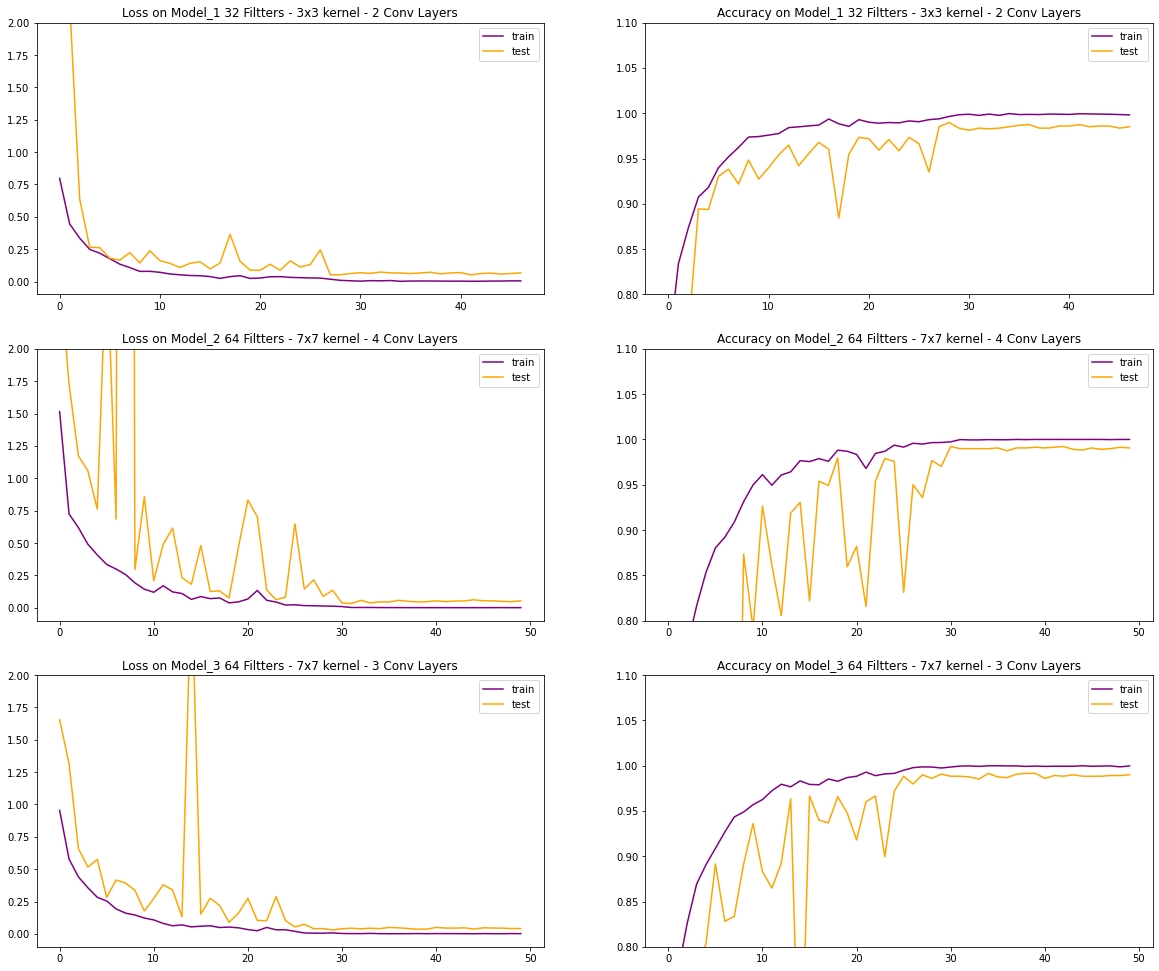

In [ ]:
# Code for plotting
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(20,17))

axs[0, 0].plot(history1.history["loss"],c = "purple")
axs[0, 0].plot(history1.history["val_loss"],c = "orange")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_1 32 Filtters - 3x3 kernel - 2 Conv Layers')

axs[0, 1].plot(history1.history["categorical_accuracy"],c = "purple")
axs[0, 1].plot(history1.history["val_categorical_accuracy"],c = "orange")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_1 32 Filtters - 3x3 kernel - 2 Conv Layers')

axs[1, 0].plot(history2.history["loss"],c = "purple")
axs[1, 0].plot(history2.history["val_loss"],c = "orange")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_2 64 Filtters - 7x7 kernel - 4 Conv Layers')

axs[1, 1].plot(history2.history["categorical_accuracy"],c = "purple")
axs[1, 1].plot(history2.history["val_categorical_accuracy"],c = "orange")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_2 64 Filtters - 7x7 kernel - 4 Conv Layers')

axs[2, 0].plot(history3.history["loss"],c = "purple")
axs[2, 0].plot(history3.history["val_loss"],c = "orange")
axs[2, 0].set_ylim([-0.1,2])
axs[2, 0].legend(["train", "test"])
axs[2, 0].set_title('Loss on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

axs[2, 1].plot(history3.history["categorical_accuracy"],c = "purple")
axs[2, 1].plot(history3.history["val_categorical_accuracy"],c = "orange")
axs[2, 1].set_ylim([0.8,1.1])
axs[2, 1].legend(["train", "test"])
axs[2, 1].set_title('Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_12 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        200768    
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
model3.evaluate(test)

41/41 [==============================] - 3s 72ms/step - loss: 0.0510 - categorical_accuracy: 0.9878


[0.05103130076442939, 0.9877956]

# Making changes on new models
I will change the number of Conv layers, FC layers, optmizer and input_shape.

## Model 4

In [ ]:
model4 = Sequential()

# Convolutional layer 1
model4.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model4.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model4.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model4.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model4.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model4.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())

# Full connect layers

model4.add(Dense(units= 1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=4, activation='softmax'))



model4.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [ ]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train = generator_train.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model4_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model4_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)


# Automatically saves the best weights of the model, based on best val_accuracy
model4_mcp = ModelCheckpoint(filepath = 'model4_weights.h5', monitor = 'val_accuracy_score',
                      save_best_only = True, verbose = 1)

history4 = model4.fit(train, steps_per_epoch=5712//32, epochs=50, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model4_es, model4_rlr, model4_mcp])

Train for 178 steps, validate for 40 steps
Epoch 1/50
178/178 [==============================] - 73s 412ms/step - loss: 0.7291 - categorical_accuracy: 0.7229 - val_loss: 1.4193 - val_categorical_accuracy: 0.2344
Epoch 2/50
178/178 [==============================] - 71s 397ms/step - loss: 0.4470 - categorical_accuracy: 0.8306 - val_loss: 1.5022 - val_categorical_accuracy: 0.3391
Epoch 3/50
178/178 [==============================] - 75s 420ms/step - loss: 0.3336 - categorical_accuracy: 0.8754 - val_loss: 0.6808 - val_categorical_accuracy: 0.7266
Epoch 4/50
178/178 [==============================] - 100s 561ms/step - loss: 0.2604 - categorical_accuracy: 0.9039 - val_loss: 0.2923 - val_categorical_accuracy: 0.8836
Epoch 5/50
178/178 [==============================] - 94s 530ms/step - loss: 0.2197 - categorical_accuracy: 0.9192 - val_loss: 0.2669 - val_categorical_accuracy: 0.8891
Epoch 6/50
178/178 [==============================] - 95s 531ms/step - loss: 0.1755 - categorical_accuracy: 0.9

In [ ]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_7 (Batch (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)      

In [ ]:
model4.evaluate(test)

41/41 [==============================] - 10s 232ms/step - loss: 0.0593 - categorical_accuracy: 0.9863


[0.059268236573410744, 0.98627]

## Model 5

In [ ]:
model5 = Sequential()

# Convolutional layer 1
model5.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model5.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Flatten())

# Full connect layers

model5.add(Dense(units= 1024, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=512, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=4, activation='softmax'))



model5.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [ ]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train = generator_train.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory(r'C:\Users\rupes\Desktop\MAJOR SEM_6\input\Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
model5_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)

history5 = model5.fit(train, steps_per_epoch=5712//32, epochs=50, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model5_es, model5_rlr, model5_mcp])

Train for 178 steps, validate for 40 steps
Epoch 1/50
177/178 [============================>.] - ETA: 0s - loss: 0.7119 - categorical_accuracy: 0.7387
Epoch 00001: val_categorical_accuracy improved from -inf to 0.31172, saving model to model5_weights.h5
178/178 [==============================] - 72s 407ms/step - loss: 0.7096 - categorical_accuracy: 0.7396 - val_loss: 1.4201 - val_categorical_accuracy: 0.3117
Epoch 2/50
177/178 [============================>.] - ETA: 0s - loss: 0.4140 - categorical_accuracy: 0.8405
Epoch 00002: val_categorical_accuracy improved from 0.31172 to 0.51016, saving model to model5_weights.h5
178/178 [==============================] - 66s 368ms/step - loss: 0.4140 - categorical_accuracy: 0.8403 - val_loss: 1.2171 - val_categorical_accuracy: 0.5102
Epoch 3/50
177/178 [============================>.] - ETA: 0s - loss: 0.3154 - categorical_accuracy: 0.8814
Epoch 00003: val_categorical_accuracy improved from 0.51016 to 0.69844, saving model to model5_weights.h5
17

In [ ]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_12 (Batc (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_13 (Batc (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 128)      

In [ ]:
model5.evaluate(test)

41/41 [==============================] - 6s 148ms/step - loss: 0.0640 - categorical_accuracy: 0.9825


[0.06400914925786598, 0.98245615]

## Evaluating models 4, 5 and 6

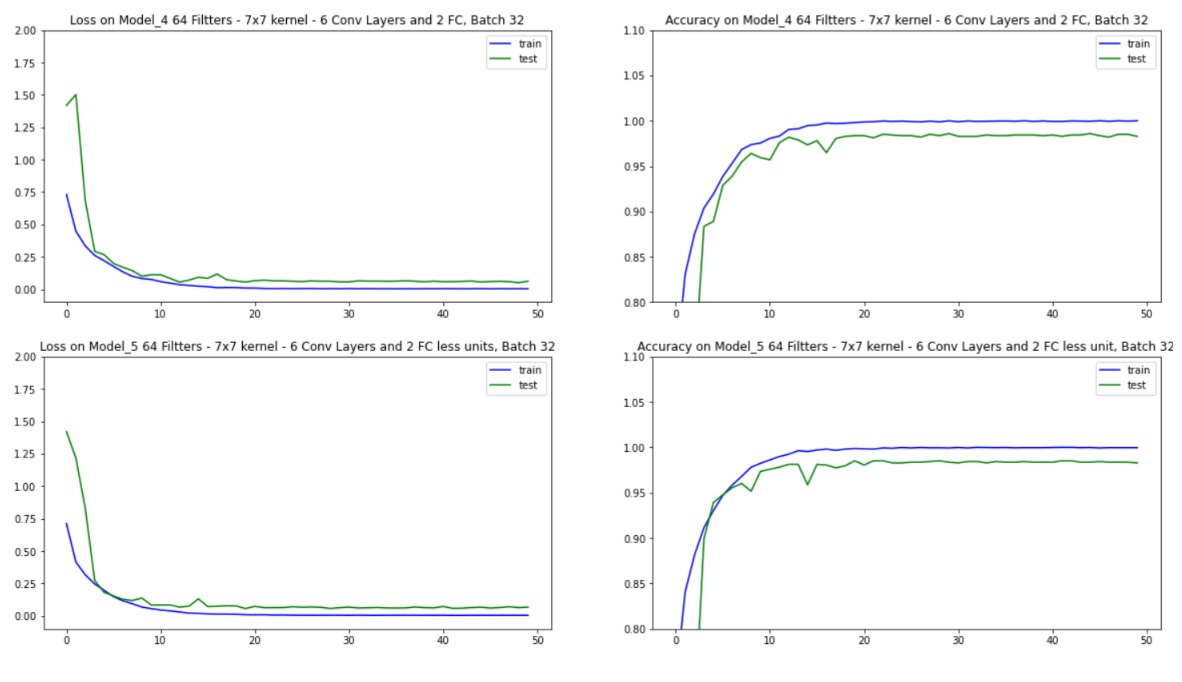

In [12]:
# Code for plotting
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(20,17))

axs[0, 0].plot(history4.history["loss"],c = "blue")
axs[0, 0].plot(history4.history["val_loss"],c = "green")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_4 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC, Batch 32')

axs[0, 1].plot(history4.history["categorical_accuracy"],c = "blue")
axs[0, 1].plot(history4.history["val_categorical_accuracy"],c = "green")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_4 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC, Batch 32')

axs[1, 0].plot(history5.history["loss"],c = "blue")
axs[1, 0].plot(history5.history["val_loss"],c = "green")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_5 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC less units, Batch 32')

axs[1, 1].plot(history5.history["categorical_accuracy"],c = "blue")
axs[1, 1].plot(history5.history["val_categorical_accuracy"],c = "green")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_5 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC less unit, Batch 32')


In [ ]:
# Saving the model
model5_json = model5.to_json()
with open('classifier_brain_tumor.json', 'w') as json_file:
    json_file.write(model5_json)